<a href="https://colab.research.google.com/github/CHIWAY-cloud/20201013_1/blob/main/Copy_of_Copy_of_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CHIWAY-cloud/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 960 (delta 0), reused 0 (delta 0), pack-reused 955
Receiving objects: 100% (960/960), 102.09 MiB | 12.20 MiB/s, done.
Resolving deltas: 100% (554/554), done.


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=434c77ab0e286f7bea569f4eed80e5f4535c8ca34de3e770c8ff1398f6164bde
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
%pwd
%cd face_recognition/examples/

/content/face_recognition/examples


In [5]:
import face_recognition
known_image = face_recognition.load_image_file("chiway.jpg")
unknown_image = face_recognition.load_image_file("Joe.jpg")
unknown_image2 = face_recognition.load_image_file("obama2.jpg")
obama_encoding = face_recognition.face_encodings(known_image)[0]
biden_encoding = face_recognition.face_encodings(unknown_image)[0]
unknown_encoding2 = face_recognition.face_encodings(unknown_image2)[0]

results = face_recognition.compare_faces([obama_encoding], biden_encoding)
results2 = face_recognition.compare_faces([obama_encoding], unknown_encoding2)

In [6]:
results, results2

([False], [False])

In [7]:
image = face_recognition.load_image_file("two_person.jpg")
face_locations = face_recognition.face_locations(image, model="cnn")

In [9]:
face_locations

[(236, 373, 391, 218), (236, 700, 391, 545)]

In [24]:
# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_encoding,
    biden_encoding
]
known_face_names = [
    "chiway",
    "dan"
]

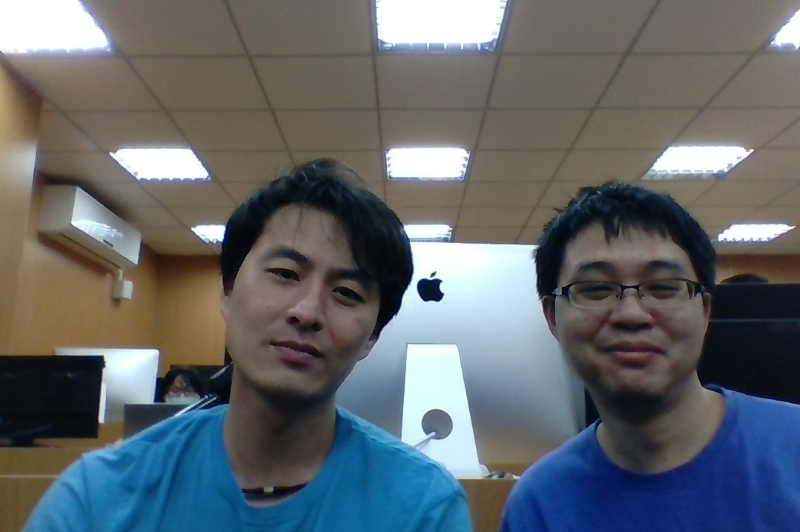

In [25]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('two_person.jpg')
display(pil_im)

In [26]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("two_person.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)


In [27]:
import numpy as np

In [28]:
for face_location, face_encoding in zip(face_locations, face_encodings):

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    #print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

    # You can access the actual face itself like this:
    #face_image = image[top:bottom, left:right]
    #pil_image = Image.fromarray(face_image)
    #pil_image.show()
    #display(pil_image)

In [29]:
del draw
pil_image.show()

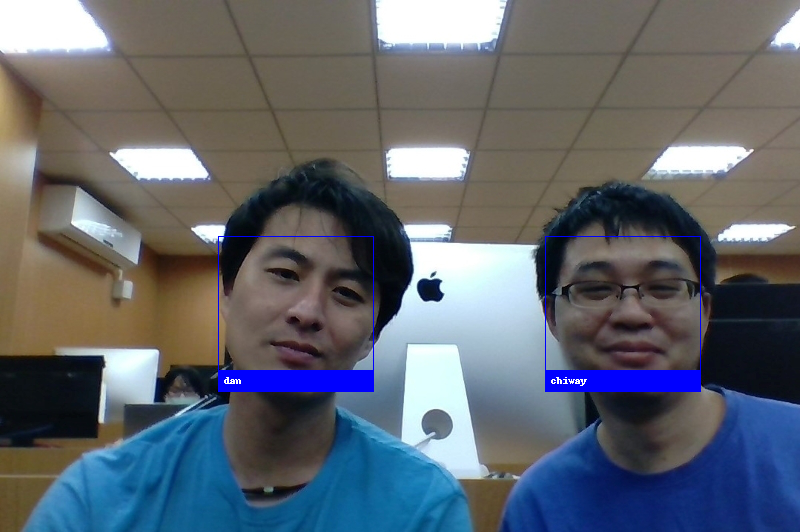

In [30]:
display(pil_image)

A face is located at pixel location Top: 236, Left: 218, Bottom: 391, Right: 373


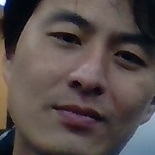

A face is located at pixel location Top: 236, Left: 545, Bottom: 391, Right: 700


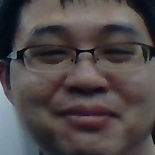

In [31]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    #pil_image.show()
    display(pil_image)